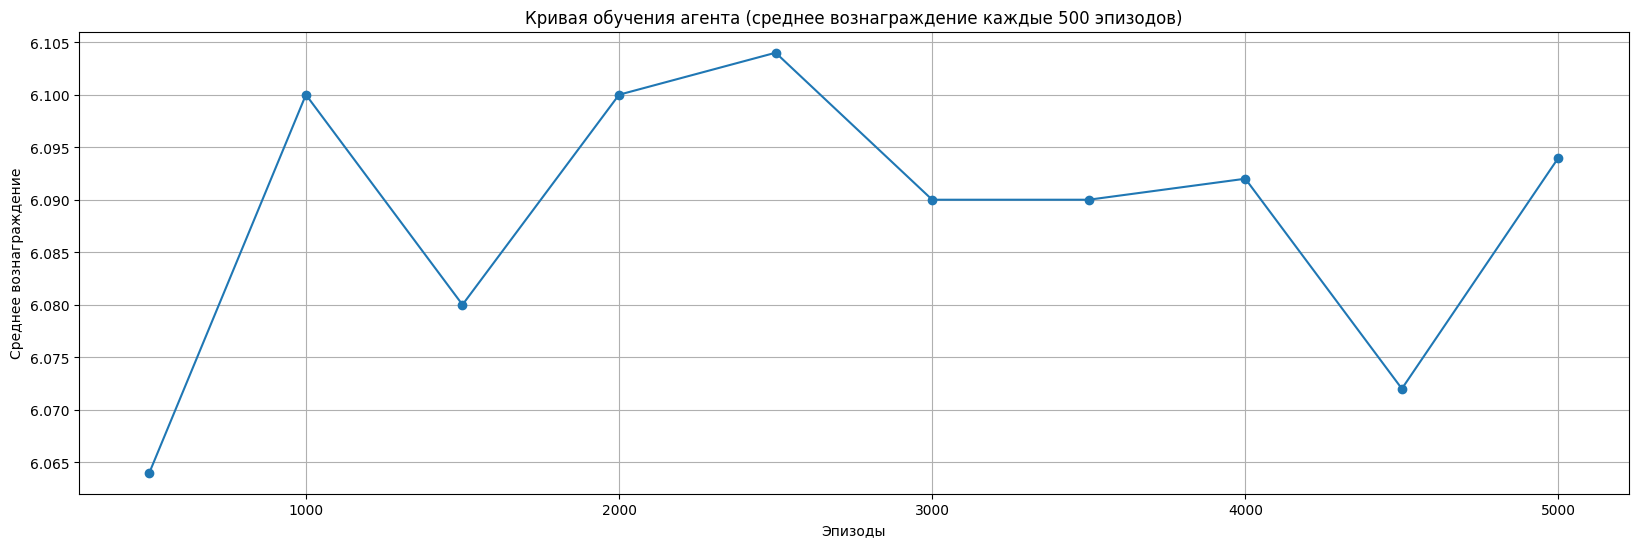

Начальные стаканы: [113 192  75  51  84]
Переливаем 52 мл из стакана 1 в стакан 3. Текущие стаканы: [113, 140, 75, 103, 84]
Переливаем 28 мл из стакана 1 в стакан 2. Текущие стаканы: [113, 112, 103, 103, 84]
Переливаем 10 мл из стакана 0 в стакан 4. Текущие стаканы: [103, 112, 103, 103, 94]
Переливаем 9 мл из стакана 1 в стакан 4. Текущие стаканы: [103, 103, 103, 103, 103]
В итоге стаканы уравнены: [103, 103, 103, 103, 103]


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Параметры
k = 5
num_episodes = 5000
learning_rate = 0.1
discount_factor = 0.9
exploration_rate = 1.0
exploration_decay = 0.995
min_exploration_rate = 0.01

# Инициализация стаканов
def initialize_glasses(k):
    return np.random.randint(50, 200, size=k)

# Проверки, все ли стаканы одинаковые
def all_equal(glasses):
    return np.allclose(glasses, np.mean(glasses))

# Основной цикл обучения
def train_agent():
    global exploration_rate
    rewards = []
    avg_rewards = []

    for episode in range(num_episodes):
        glasses = initialize_glasses(k)
        total_reward = 0

        while not all_equal(glasses):

            avg = np.mean(glasses)
            excess_idx = np.argmax(glasses - avg)
            deficit_idx = np.argmin(glasses - avg)

            # Переливание жидкости
            transfer_amount = min(glasses[excess_idx] - avg, avg - glasses[deficit_idx])
            glasses[excess_idx] -= transfer_amount
            glasses[deficit_idx] += transfer_amount

            total_reward -= 1

        total_reward += 10
        rewards.append(total_reward)

        # Обновление коэффициента исследования
        exploration_rate = max(min_exploration_rate, exploration_rate * exploration_decay)

        # Запись среднего вознаграждения каждые 500 эпизодов
        if (episode + 1) % 500 == 0:
            avg_rewards.append(np.mean(rewards[-500:]))

    return avg_rewards

# Обучение агента
avg_rewards = train_agent()

# График обучения
plt.figure(figsize=(20, 6))
plt.plot(range(500, num_episodes + 1, 500), avg_rewards, marker='o')
plt.title('Кривая обучения агента (среднее вознаграждение каждые 500 эпизодов)')
plt.xlabel('Эпизоды')
plt.ylabel('Среднее вознаграждение')
plt.grid()
plt.show()

# Демонстрация действий по переливанию
def demonstrate_agent_actions():
    glasses = initialize_glasses(k)
    print("Начальные стаканы:", glasses)

    while not all_equal(glasses):
        avg = np.mean(glasses)
        excess_idx = np.argmax(glasses - avg)
        deficit_idx = np.argmin(glasses - avg)

        transfer_amount = min(glasses[excess_idx] - avg, avg - glasses[deficit_idx])
        glasses[excess_idx] -= transfer_amount
        glasses[deficit_idx] += transfer_amount

        print(f"Переливаем {int(transfer_amount)} мл из стакана {excess_idx} в стакан {deficit_idx}. Текущие стаканы: {[int(g) for g in glasses]}")

    print("В итоге стаканы уравнены:", [int(g) for g in glasses])


demonstrate_agent_actions()
